## Table of Content
1. Libraries
2. Training & DataLoader
3. Building the CNN
4. Summary
5. Training The CNN
6. Testing 
7. Conclusion

## Libraries


In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np
from tensorflow.keras.preprocessing import image

In [2]:
import os
import pandas as pd

 ## Training & DataLoader

In [3]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [4]:
pwd

'C:\\Users\\Harsh Toshniwal'

In [5]:
my_data_dir = 'D:/College/Cotton'

In [6]:
os.listdir(my_data_dir) 

['bacterial-blight.png', 'images.jpg', 'test', 'train']

In [7]:
test_path = my_data_dir+'\\test\\'
train_path = my_data_dir+'\\train\\'

In [8]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size=  (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 1709 images belonging to 4 classes.
Found 1709 images belonging to 4 classes.


## Building the CNN

In [9]:
# Initialising the CNN
cnn = Sequential()

# Step 1 - Convolution
cnn.add(Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(MaxPool2D(pool_size=2))

# Adding a second convolutional layer
cnn.add(Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(MaxPool2D(pool_size=2))

# Step 3 - Flattening
cnn.add(Flatten())

# Step 4 - Full Connection
cnn.add(Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(Dense(units=4, activation='softmax')) 

In [10]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

## Summary

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 128)               1

## Training the CNN


In [12]:
# Compiling the CNN
cnn.compile(optimizer = 'adam',loss = 'categorical_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
cnn.fit(x = training_set, validation_data = test_set, epochs = 20, callbacks=[early_stop])

Epoch 1/20
54/54 [==============================] - 15s 268ms/step - loss: 1.0162 - accuracy: 0.5518 - val_loss: 0.7242 - val_accuracy: 0.7098
Epoch 2/20
54/54 [==============================] - 14s 270ms/step - loss: 0.7352 - accuracy: 0.6987 - val_loss: 0.6319 - val_accuracy: 0.7361
Epoch 3/20
54/54 [==============================] - 15s 269ms/step - loss: 0.6270 - accuracy: 0.7601 - val_loss: 0.5269 - val_accuracy: 0.7894
Epoch 4/20
54/54 [==============================] - 15s 285ms/step - loss: 0.5462 - accuracy: 0.7917 - val_loss: 0.5377 - val_accuracy: 0.8128
Epoch 5/20
54/54 [==============================] - 16s 293ms/step - loss: 0.4581 - accuracy: 0.8373 - val_loss: 0.5836 - val_accuracy: 0.7806
Epoch 6/20
54/54 [==============================] - 15s 289ms/step - loss: 0.3488 - accuracy: 0.8730 - val_loss: 0.3617 - val_accuracy: 0.8742
Epoch 7/20
54/54 [==============================] - 15s 289ms/step - loss: 0.3109 - accuracy: 0.8841 - val_loss: 0.4387 - val_accuracy: 0.8327

## Testing 

In [13]:
losses = pd.DataFrame(cnn.history.history)

In [14]:
losses

,loss,accuracy,val_loss,val_accuracy
0,1.016191,0.551785,0.724213,0.709772
1,0.735205,0.698654,0.631930,0.736103
2,0.627045,0.760094,0.526942,0.789351
3,0.546239,0.791691,0.537710,0.812756
4,0.458083,0.837332,0.583632,0.780573
5,0.348792,0.873025,0.361703,0.874195
6,0.310903,0.884143,0.438710,0.832651
7,0.307894,0.889994,0.318726,0.894090
8,0.211016,0.932124,0.378637,0.857812
9,0.210584,0.931539,0.229737,0.909304


<AxesSubplot:>

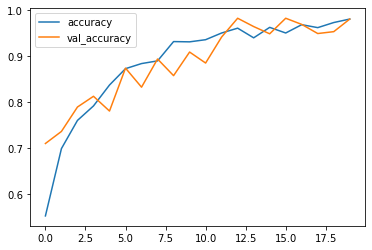

In [15]:
losses[['accuracy', 'val_accuracy']].plot()

<AxesSubplot:>

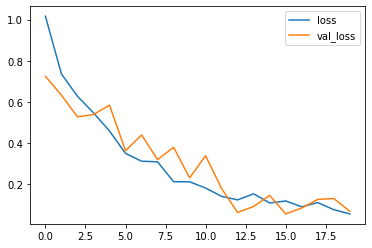

In [16]:
losses[['loss', 'val_loss']].plot()

In [17]:
pwd

'C:\\Users\\Harsh Toshniwal'

In [18]:
my_data_dir = 'D:/College/Cotton'

In [19]:
os.listdir(my_data_dir) 

['bacterial-blight.png', 'images.jpg', 'test', 'train']

In [33]:
test_image = image.load_img('D:/College/Cotton/curl.png',
                            target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 15ms/step


In [34]:
result

array([[5.1908825e-07, 9.5356482e-01, 4.6434626e-02, 4.4985271e-08]],
      dtype=float32)

In [35]:
result = result.ravel() 

In [36]:
result

array([5.1908825e-07, 9.5356482e-01, 4.6434626e-02, 4.4985271e-08],
      dtype=float32)

In [37]:
print("Largest element is:", np.max(result), "i.e. at the position",  np.argmax(result) + 1)

Largest element is: 0.9535648 i.e. at the position 2


In [38]:
#result.sort()
#result 

In [39]:
result=result.tolist()

In [40]:
predictions = cnn.predict(test_set)

54/54 [==============================] - 6s 106ms/step


In [41]:
predictions_in_binary = predictions > 0.5
predictions_in_binary

array([[False,  True, False, False],
       [False, False,  True, False],
       [False, False, False,  True],
       ...,
       [False, False, False,  True],
       [False,  True, False, False],
       [ True, False, False, False]])

## Conclusion

In [42]:
result

[5.190882461647561e-07,
 0.9535648226737976,
 0.04643462598323822,
 4.498527061969071e-08]

In [43]:
classes=["bacterial light","curl virus","fussarium wilt","healthy plant"]
#max = result[0];    
maximum = 0     
#Loop through the array    
for i in result:    
    #Compare elements of array with max    
    if(i > maximum):    
        maximum = i
        
           
print("Largest element present in given array: " + str(maximum) +" And it belongs to " + classes[np.argmax(result)] +" class.");      

Largest element present in given array: 0.9535648226737976 And it belongs to curl virus class.
